![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S2468067216300116-gr1.jpg "Logo Title Text 1")

In [47]:
%matplotlib inline
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import imutils
import pytesseract
from PIL import Image

In [37]:
def PreProcessing(image):
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray=cv2.GaussianBlur(gray,(5,5), 0)
    ret3,th3 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return th3

def show(image,Name='Outline'):
    cv2.imshow(Name,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

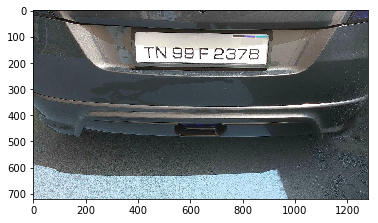

In [3]:
image_1 = cv2.imread('car_2.jpg',1)
plt.imshow(image_1,cmap='gray')

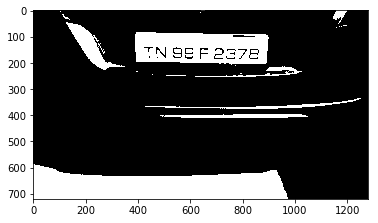

In [4]:
img_gray = PreProcessing(image_1)
plt.imshow(img_gray,cmap='gray')

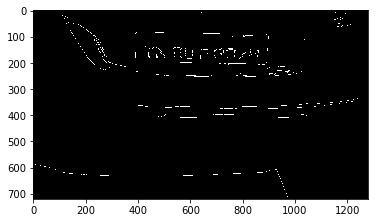

In [7]:
img_gray = cv2.bilateralFilter(img_gray, 11, 17, 17)
edged = cv2.Canny(img_gray, 30, 200)

plt.imshow(edged,cmap="gray")

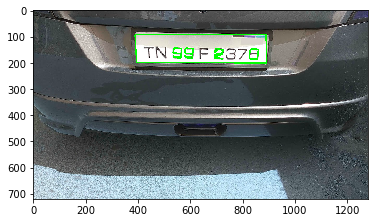

In [51]:
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    rect = cv2.minAreaRect(c)
    # box = cv2.boxPoints(rect)

    cv2.drawContours(image_1, [approx], -1, (0, 255, 0), 3)
    
    if len(approx) == 4:
        screenCnt = approx
        break

plt.imshow(image_1)

In [40]:
box = cv2.boundingRect(c)

[x,y,width,height] = box

print x,y,width,height

389 83 511 123


True

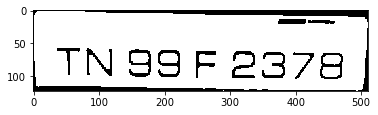

In [48]:
crop = img_gray[y:y+height,x:x+width]

plt.imshow(crop,cmap="gray")

cv2.imwrite('crop.jpg',crop)

In [50]:
a=pytesseract.image_to_string(Image.open("crop.jpg"))

print a

TN 99 F 2378]
